In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
xl=pd.read_excel('/Users/zagranichnyid/Desktop/Тестовое задание/Аналитика-тест данные.xlsx')
xl.head(5)

,№ Полиса,Название ПИФ/Индекса,Уст.прод./вал. прод.,Партнер,"Ставка купона, %","Доля рис. фонда, %","Процент комиссии, %",Статус,Start date,Expiry date,Buy Date,Sold Date,Сумма премий
0,1,Акции - Алроса,RUB,ХХХ,4.95,14.86,2.71,Подписан,06.10.2023,06.10.2026,08.11.2023,23.09.2026,600000.0
1,2,Акции - Алроса,RUB,ХХХ,4.95,14.86,2.71,Выпущен,09.10.2023,09.10.2026,15.11.2023,30.09.2026,100000.0
2,3,Акции - Алроса,RUB,ХХХ,4.95,14.86,2.71,Выпущен,11.10.2023,11.10.2026,15.11.2023,30.09.2026,107384.0
3,4,Акции - Алроса,RUB,ХХХ,4.95,14.86,2.71,Аннулирован,19.10.2023,19.10.2026,22.11.2023,06.10.2026,0.0
4,5,Акции - Алроса,RUB,ХХХ,4.95,14.86,2.71,Аннулирован,19.10.2023,19.10.2026,22.11.2023,06.10.2026,0.0


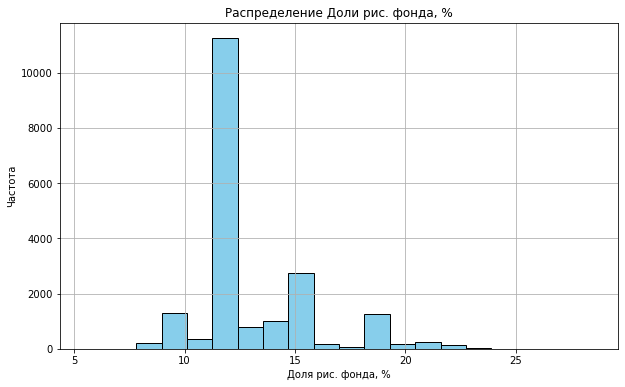

In [56]:
plt.figure(figsize=(10, 6))
xl['Доля рис. фонда, %'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.title('Распределение Доли рис. фонда, %')
plt.xlabel('Доля рис. фонда, %')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

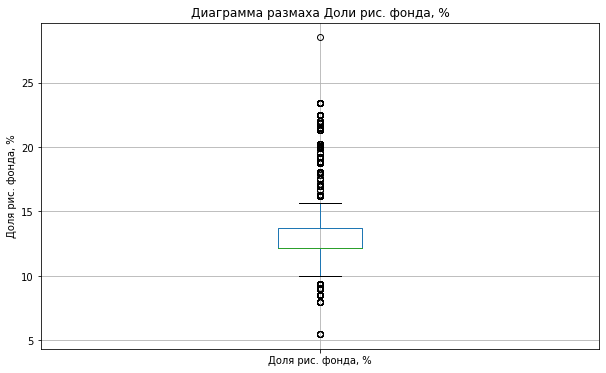

In [57]:
plt.figure(figsize=(10, 6))
xl.boxplot(column='Доля рис. фонда, %')
plt.title('Диаграмма размаха Доли рис. фонда, %')
plt.ylabel('Доля рис. фонда, %')
plt.show()

In [58]:
quartiles = xl['Доля рис. фонда, %'].describe(percentiles=[.25, .5, .75])
print("Квартиль Q1 (25%):", quartiles['25%'])
print("Квартиль Q2 (50%):", quartiles['50%'])
print("Квартиль Q3 (75%):", quartiles['75%'])

Квартиль Q1 (25%): 12.19
Квартиль Q2 (50%): 12.19
Квартиль Q3 (75%): 13.73


In [59]:
Q1 = xl['Доля рис. фонда, %'].quantile(0.25)
Q3 = xl['Доля рис. фонда, %'].quantile(0.75)
IQR = Q3 - Q1

In [60]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [90]:
outliers = xl[(xl['Доля рис. фонда, %'] < lower_bound) | (xl['Доля рис. фонда, %'] > upper_bound)]
outliers.head(5)


,№ Полиса,Название ПИФ/Индекса,Уст.прод./вал. прод.,Партнер,"Ставка купона, %","Доля рис. фонда, %","Процент комиссии, %",Статус,Start date,Expiry date,Buy Date,Sold Date,Сумма премий
6,7,Акции - Алроса,RUB,ХХХ,4.3,21.49,5.16,Выпущен,2023-11-21,2028-11-21,2023-12-27,2028-11-15,185529.0
7,8,Акции - Алроса,RUB,ХХХ,4.3,21.49,5.16,Черновик,2023-12-12,2028-12-12,2024-01-17,2028-11-22,2000000.0
11,12,Акции - АФК Система,RUB,ХХХ,4.3,21.49,5.16,Выпущен,2023-09-10,2028-09-10,2023-08-11,2028-09-27,500000.0
12,13,Акции - АФК Система,RUB,ХХХ,4.3,21.49,5.16,Подписан,2023-03-11,2028-03-11,2023-06-12,2028-10-25,350000.0
19,20,Акции - ВТБ,RUB,ХХХ,4.3,21.49,5.16,Выпущен,2023-10-17,2028-10-17,2023-11-22,2028-11-10,350000.0


In [88]:
correlations = xl.corr()['Доля рис. фонда, %']
correlations

№ Полиса               0.033316
Ставка купона, %       0.296989
Доля рис. фонда, %     1.000000
Процент комиссии, %    0.078209
Сумма премий           0.038854
Name: Доля рис. фонда, %, dtype: float64

Исходя из выявленных коэффициентов корреляции:

1. Показатель с наибольшей корреляцией с "Доля рис. фонда, %" (показатель 1.000000) - сам с собой, что естественно.

2. Показатель с наибольшей корреляцией, не учитывая самого себя:
   - Ставка купона, % (коэффициент корреляции 0.296989).

Таким образом, из предоставленных показателей "Ставка купона, %" имеет наибольшую корреляцию с "Доля рис. фонда, %". Это может свидетельствовать о наличии некоторой статистической взаимосвязи между этими двумя показателями.

In [87]:
xl[['Start date','Expiry date','Buy Date','Sold Date']] = xl[['Start date','Expiry date','Buy Date','Sold Date']].apply(pd.to_datetime)
xl['Статус'].unique()

array(['Подписан', 'Выпущен', 'Аннулирован', 'Черновик', 'Смерть',
       'Расторгнут', 'Отменен', 'Уведом о смерти'], dtype=object)

In [86]:
mask_fosagro_death = (xl['Название ПИФ/Индекса'] == 'Акции - Фосагро') & (xl['Статус'].isin(['Смерть', 'Уведом о смерти']))

In [80]:
df_fosagro_death = xl[mask_fosagro_death]
df_other_contracts = xl[~mask_fosagro_death]